# Applying logistic regression model of supervised learning model as the given data can be divided into training data and holdout data(testing data) where the prediction only gives result in the form of 0(customer is not interested) and 1(customer is interested).

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# classifying the data

In [ ]:
df = pd.read_csv('insurence.csv')
replacements = {'Male': 0, 'Female': 1, 'Yes': 1, 'No': 0, '1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 2}
df = df.replace(replacements)
df.to_csv('updated1.csv', index=False)
data = pd.read_csv('updated1.csv')

print(data)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1       0   44                1           28                   0   
1            2       0   76                1            3                   0   
2            3       0   47                1           28                   0   
3            4       0   21                1           11                   1   
4            5       1   29                1           41                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105       0   74                1           26                   1   
381105  381106       0   30                1           37                   1   
381106  381107       0   21                1           30                   1   
381107  381108       1   68                1           14                   0   
381108  381109       0   46                1           29                   0   

        Vehicle_Age  Vehicl

# dividing the data into training set and testing set

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print("X_train shape: ",X_train.shape)
print("y_train shape: ",y_train.shape)
print("X_test shape: ",X_test.shape)
print("y_test shape: ",y_test.shape)

X_train shape:  (304887, 11)
y_train shape:  (304887,)
X_test shape:  (76222, 11)
y_test shape:  (76222,)


In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

print (X_train[0:304887, :])

[[ 1.2925592   1.0847756   0.01060114 ...  1.29441692 -1.05046307
   0.86950541]
 [-0.6757296  -0.92184964 -0.05387549 ... -0.4366383  -1.58522262
  -1.49771923]
 [ 0.58544585 -0.92184964 -1.0855015  ...  0.85464034  0.73821545
   0.14020893]
 ...
 [-0.53317625  1.0847756  -1.0855015  ... -0.67895589  0.73821545
  -0.93580227]
 [-0.39743063 -0.92184964  0.33298427 ... -1.61942171  0.81197539
  -1.23469427]
 [-0.62383088  1.0847756  -0.76311837 ... -0.33793778  0.73821545
  -0.32606259]]


# applying logistic regression model

In [ ]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_pred)

[0 0 0 ... 0 0 0]


# calculating accuracy of the model

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("accuracy of the model: ",accuracy)
print()
print("classification report: ")
print(classification_rep)
print("confusion matrics: ")
print(confusion_mat)

accuracy of the model:  0.8750360788223872

classification report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.47      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.67      0.50      0.47     76222
weighted avg       0.82      0.88      0.82     76222

confusion matrics: 
[[66682    17]
 [ 9508    15]]


# confusion matrix

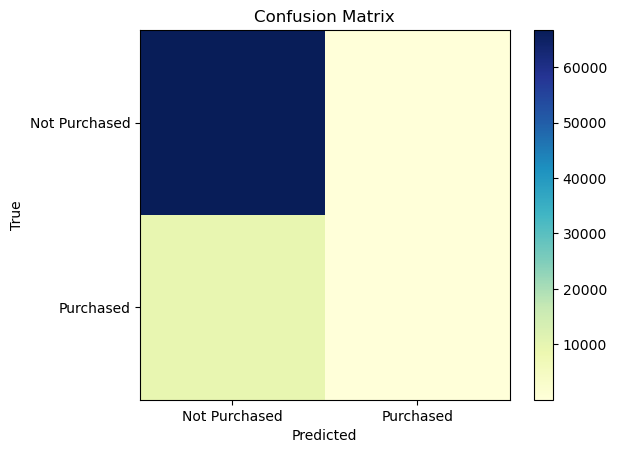

In [ ]:
# Plot of Confusion Matrix
plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.YlGnBu)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ['Not Purchased', 'Purchased'])
plt.yticks([0, 1], ['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC(reciever operating curve) curve

The ROC curve provides insights into how well the model can discriminate between the positive and negative classes across different levels of sensitivity and specificity.

Interpreting the ROC curve:
The curve closer to the upper-left corner indicates better performance.

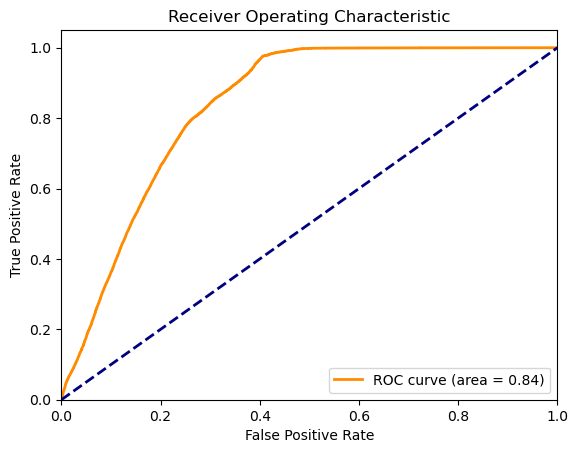

In [ ]:

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# precision recall plot

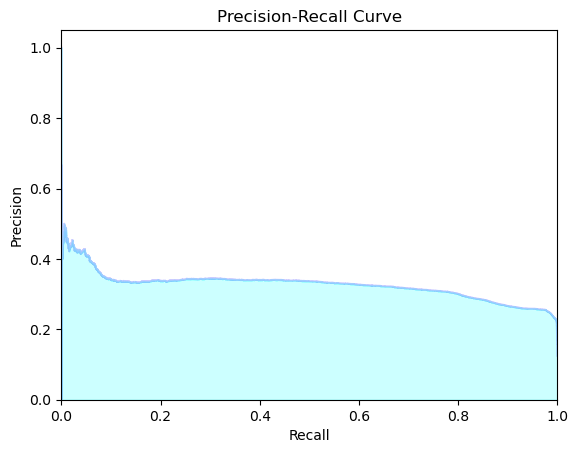

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='cyan')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# 'y_true' contains the true labels of your data
y_true = ...  # Fill this with the true labels

# Calculating predicted probabilities
probs = model.predict_proba(X_new)[:, 1]  # Probabilities for class 1

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, probs)
roc_auc = roc_auc_score(y_true, probs)

# Find the optimal threshold that maximizes the Youden's J statistic (tpr - fpr)
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

# Making predictions using the optimal threshold
predictions = [1 if prob >= optimal_threshold else 0 for prob in probs]
print(predictions)

